In [1]:
# Put import statements here
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Part 1: Graphing

1. Load the data from the kmeans_data.txt. 

2. Plot the dataset. Can you see any distinct clusters? 

2. Run KMeans on it using 3 centroids. 

3. Plot the three centroids (These will be the mean of your clusters). What do you notice? Do the centroids seem intuitive? 

In [2]:
df = pd.read_csv("data/kmeans_data.txt", "\t", header=None)
df.tail()

,0,1
4995,540118,671072
4996,507453,777031
4997,569266,738385
4998,444587,878830
4999,434041,814466


In [3]:
df.shape

(5000, 2)

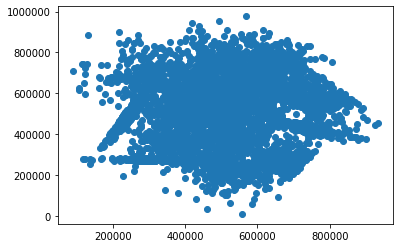

In [4]:
plt.scatter(df[0], df[1])

There are some dense blobs inside, but it's rather hard to tell.

In [5]:
X = df.values
km = KMeans(n_clusters=3).fit(X)

km.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [7]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([1655, 1468, 1877]))

In [8]:
# these are the coordinates of the 3 centroids
km.cluster_centers_

array([[316483.85196375, 445278.76858006],
       [621752.46190477, 343133.1877551 ],
       [574524.48053334, 663584.82613333]])

In [9]:
km.predict(X)

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [10]:
from collections import Counter
Counter(km.predict(X))

Counter({2: 1877, 0: 1655, 1: 1468})

In [11]:
df['predictions'] = km.predict(X)
df.head()

,0,1,predictions
0,624474,837604,2
1,673412,735362,2
2,647442,677000,2
3,532283,741384,2
4,646529,742844,2


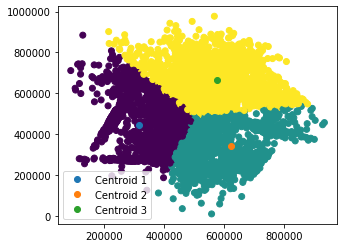

In [12]:
predictions = km.predict(X)

plt.figure(figsize=(5,4))
plt.scatter(X[:, 0], X[:, 1], c=predictions)
plt.plot(km.cluster_centers_[0][0], km.cluster_centers_[0][1], 'o', label='Centroid 1')
plt.plot(km.cluster_centers_[1][0], km.cluster_centers_[1][1], 'o', label='Centroid 2')
plt.plot(km.cluster_centers_[2][0], km.cluster_centers_[2][1], 'o', label='Centroid 3')

plt.legend();

The centroids ended up in pretty much where you'd expect, as something close to an equilateral triangle within the blob.  It's like you slice the pie in 3 equal slices.

### Part 2: Calculating

1. Calculate the intra-cluster sums of squares. The beginning of the function is given to you below. The output should be a plot of the within cluster sum of squares for a given number of clusters. The formula is:

$$ \displaystyle J_k = \sum_{k=1}^K \sum_{\mathrm{x}_i \in C_k} ||\mathrm{x}_i - \mu_k ||^2 $$

2. Now you can calculate the Silhouette Coefficient. <a href = http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient>Use the sklearn implementation which can be found here</a>.

3. From these graphs what seems to be the optimal coefficients? 

In [13]:
df[df['predictions'] == 0].tail()

,0,1,predictions
4646,244943,475408,0
4647,238028,480427,0
4648,257462,493419,0
4649,237644,454323,0
4694,383900,572382,0


In [ ]:
# clusters[i] = df[df['predictions'] == i].loc[:,[0,1]].values

In [14]:
cluster_0 = df[df['predictions'] == 0]
cluster_1 = df[df['predictions'] == 1]
cluster_2 = df[df['predictions'] == 2]
# km.cluster_centers_[0]
# km.cluster_centers_[1]
# km.cluster_centers_[2]

In [15]:
del cluster_0['predictions']
del cluster_1['predictions']
del cluster_2['predictions']

In [16]:
cluster_0.values

array([[301956, 680587],
       [304189, 697456],
       [286274, 728734],
       ...,
       [257462, 493419],
       [237644, 454323],
       [383900, 572382]])

In [17]:
km.cluster_centers_[0]

array([316483.85196375, 445278.76858006])

In [18]:
import scipy
# .spatial.distance.euclidean(u, v)
def intra_cluster_sum_of_squares(x_i, centroid):
    '''
    Input:
        x_i is the set of points within the ith cluster
        centroid is the ith cluster center
    Output:
        plot of the within cluster sum of squares for a given number of clusters
    '''
# #     Jk=∑k=1K∑xi∈Ck||xi−μk||2
    sum_of_squares = 0
    for point in x_i:
#         sum_of_squares += (np.linalg.norm(point - centroid))**2
        sum_of_squares += scipy.spatial.distance.euclidean(point, centroid)
    
        
    return (sum_of_squares)

In [19]:
intra_cluster_sum_of_squares(cluster_0, km.cluster_centers_[0])

1092583.0834126654

### Part 3: Do it again

Now run all these steps on the kmeans_data_spread.txt. What do you notice about this dataset? How does it compare to the other one? Compare and contrast the graphs for the silhouette coefficient and within cluster sum of squares. 

In [20]:
df.head()

,0,1,predictions
0,624474,837604,2
1,673412,735362,2
2,647442,677000,2
3,532283,741384,2
4,646529,742844,2


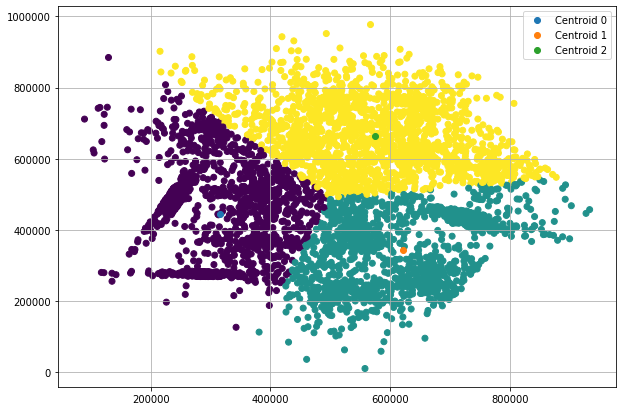

In [21]:
def plot_centroids(data, km):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        labels - (list) List containing the labels for each datapoint
    Output:
        Plot showing the original datapoints and cluster centers found by KMeans
    '''
    plt.figure(figsize=(10,7))
    plt.grid()
    X = df[0] + df[1]
    X = X.values
    predictions = df["predictions"]
    
    for idx, i in enumerate(km.cluster_centers_):
        plt.plot(i[0], i[1],'o',label='Centroid ' + str(idx))
        
    plt.legend()
    plt.scatter(df[0],df[1],c=predictions);
    
plot_centroids(df, km)

In [22]:
df.mean()

0              502998.0590
1              497112.7394
predictions         1.0444
dtype: float64

In [23]:
len(df)

5000

In [26]:
def plot_Wk(data, clusters):
#     print(len(clusters))
    '''
    Input:
        data - (DataFrame) Data to cluster on
        clusters - (list) List containing the number of clusters to check for
    Output:
        Plot showing the within cluster sum of squares
    '''
    df = data
    X = data.values

    vertical_axis = []
    
    for k in clusters:
        within_cluster_sum_of_squares = []
        km = KMeans(n_clusters=k).fit(X)
        centroids = km.cluster_centers_

        for i in range(len(centroids)):
            cluster_k = df[km.labels_ == i].values
            within_cluster_sum_of_squares.append(intra_cluster_sum_of_squares(cluster_k, km.cluster_centers_[i]))
        print(sum(within_cluster_sum_of_squares))
    
        vertical_axis.append(sum(within_cluster_sum_of_squares))
        
    plt.plot(clusters, vertical_axis)

In [27]:
num_clusters = list(range(3, 30, 3))
num_clusters

[3, 6, 9, 12, 15, 18, 21, 24, 27]

682230685.3357393
470828328.848575
361144496.23202664
285923001.1252354
231160035.6980434
217541940.72838888
205180803.35835868
195888747.53003317
186044427.70847657


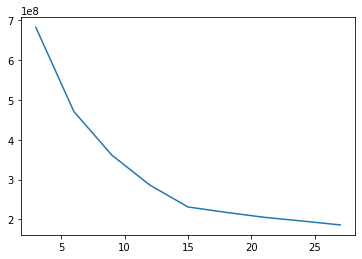

In [28]:
plot_Wk(df, num_clusters)

In [29]:
from sklearn.metrics import silhouette_score
silhouette_score(df, km.labels_)

0.4001079276957475

In [31]:
from sklearn.metrics import silhouette_score

def plot_silhouette(data, clusters):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        clusters - (list) List containing the number of clusters to check for
    Output:
        Plot showing the silhouette score for different numbers of centroids
    '''  
    df = data
    X = data.values
    
    vertical_axis = []
    
    for k in clusters:
        within_cluster_sum_of_squares = []
        km = KMeans(n_clusters=k).fit(X)
        centroids = km.cluster_centers_        
        vertical_axis.append(silhouette_score(df, km.labels_))
    plt.grid()
    plt.plot(clusters, vertical_axis)

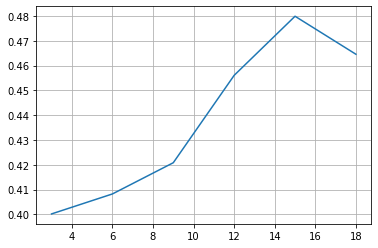

In [32]:
num_clusters = list(range(3, 20, 3))
plot_silhouette(df, num_clusters)

The optimal k is 15.

4. Another thing you can do is plot the original dataset at an alpha = 0.1. What do you notice about the graph? From your intuition, how many clusters do you think there should be? 

5. Plot the clusters generated from KMeans using the optimal number of clusters you found.

In [ ]:
scatter(df[0], df[1], alpha=.1)

Cool we ended up with 15 dark spots.

In [ ]:
X = df.values
km = KMeans(n_clusters=15).fit(X)

km.labels_

In [ ]:
# these are the coordinates of the 3 centroids
km.cluster_centers_

In [ ]:
predictions = km.predict(X)

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=predictions)

for i in range(15):
    plt.plot(km.cluster_centers_[i][0], km.cluster_centers_[i][1], 'o', label='Centroid '+str(i))

plt.legend();

In [ ]:
num_clusters = list(range(10, 20))
# print(len(num_clusters))
plot_Wk(df, num_clusters)

In [ ]:
num_clusters = list(range(10, 20))

plot_silhouette(df, num_clusters)

15 is the best k.